# Non-hierarchy clustering methods

## Parse data

In [35]:
import pandas as pd
import numpy as np

import plotly
import plotly.graph_objs as go
import seaborn as sns
from sklearn import decomposition, preprocessing

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram, cophenet, centroid
from scipy.spatial.distance import pdist
import scipy.sparse as sp
from scipy import ndimage
from sklearn.cluster import KMeans, AgglomerativeClustering

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (50,20)


In [36]:
humidity = pd.read_csv('dataClean/humidity.csv', sep=',')
pressure = pd.read_csv('dataClean/pressure.csv', sep=',')
temperature = pd.read_csv('dataClean/temperature.csv', sep=',')
def Mean(listDataFrame):
    listDataFrame = listDataFrame.drop('datetime', 1)
    return np.mean(listDataFrame, axis = 0) 
humidity = Mean(humidity)
pressure = Mean(pressure)
temperature = Mean(temperature)
df = pd.DataFrame([humidity, pressure, temperature], ['humidity', 'pressure', 'temperature']).T
fig1 = go.Scatter3d(x=concatDF['humidity'], y=concatDF['pressure'], z=concatDF['temperature'],
                    marker=dict(opacity=0.9, reversescale=True, colorscale='Blues', size=5), line=dict (width=0.02), mode='markers')
mylayout = go.Layout(scene=dict(xaxis=dict( title="Humidity"), yaxis=dict( title="Pressure"), zaxis=dict( title="Temperature")),)
#  auto_open=True,
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     filename=("3DPlot.html"))

'3DPlot.html'

## Normalize dataframe

In [37]:
X = df.values
X = X.astype(float)
X = (X - X.mean(axis = 0))/X.std(axis = 0)
X.mean(axis = 0)

array([-5.24271984e-17, -5.75249724e-14,  6.41462192e-16])

## Visualize our data

## Prepare to k-means

In [38]:
# import libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans

## Remake our coordinates to sufficient format

In [39]:
X = np.array([[x[i], y[i]] for i in range(len(x))])
X

array([[-1.41070587, -0.16205551],
       [-1.03126408, -0.22173237],
       [-0.78016825,  0.39333109],
       [-1.41491782, -0.14209975],
       [ 0.58319807,  0.13175913],
       [ 0.06920118,  0.30563754],
       [ 2.66599255, -0.99638616],
       [ 2.71962869, -0.25322852],
       [ 1.40261107, -1.66523131],
       [ 0.72772566, -1.82485111],
       [ 0.3933032 ,  0.93234076],
       [ 0.32653475,  0.59042899],
       [-0.09514442,  1.34643255],
       [-0.09638112, -0.41018914],
       [-1.08127497, -1.18352347],
       [-0.67017578, -0.09252466],
       [-1.14321591, -0.53124542],
       [-0.43660068,  0.16676271],
       [-0.92041921, -0.36047196],
       [-0.48983169,  0.49752373],
       [-1.10226471, -0.66808856],
       [-0.38807291,  1.539305  ],
       [-0.47811405,  0.29357437],
       [ 0.16520292,  2.11571251],
       [-0.89016937, -0.56627829],
       [-1.32339636, -0.71879825],
       [-0.73763407, -0.39503193],
       [-0.30612176, -0.5909765 ],
       [-1.038593  ,

## Create k-means model

In [40]:
kmeans_form = KMeans(n_clusters=5)
kmeans_form.fit(X)
kmeans_form.cluster_centers_ # find cluster centers

array([[-0.87982437, -0.32876337],
       [ 2.88620737, -0.41784108],
       [-0.06654916,  1.60722379],
       [ 0.56237378,  0.56197197],
       [ 1.06516836, -1.74504121]])

## Visualize division to clusters

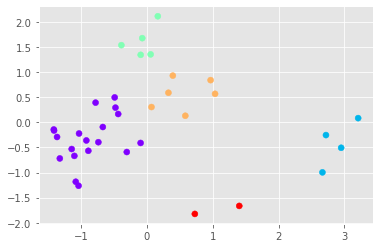

In [41]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans_form.labels_, cmap='rainbow')
plt.show()

## Now visualize with centers

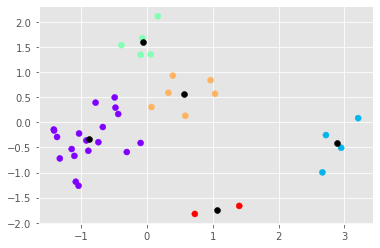

In [42]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans_form.labels_, cmap='rainbow')
plt.scatter(kmeans_form.cluster_centers_[:, 0], kmeans_form.cluster_centers_[:, 1], color='black')
plt.show()